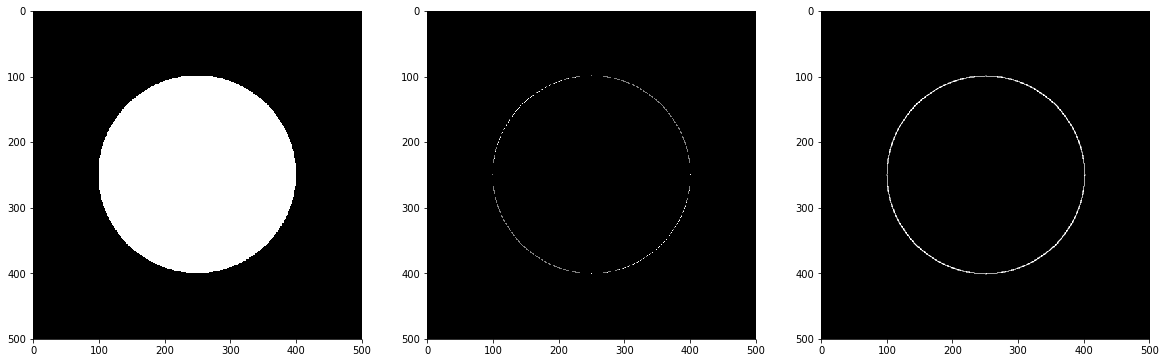

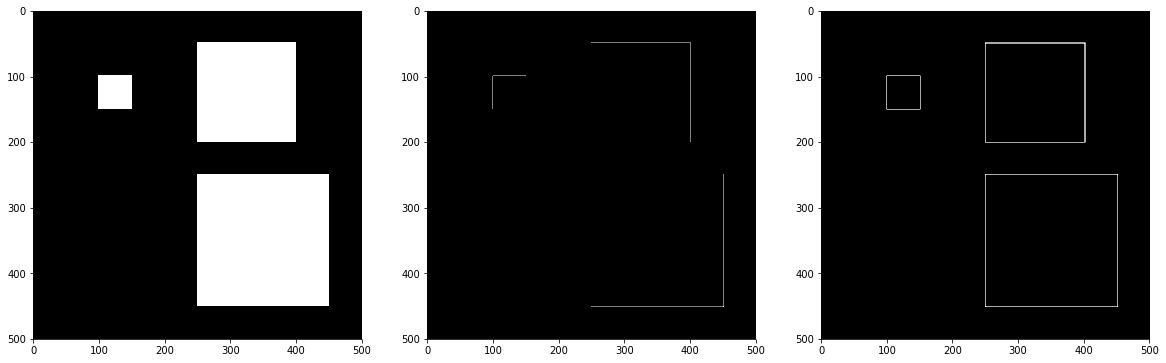

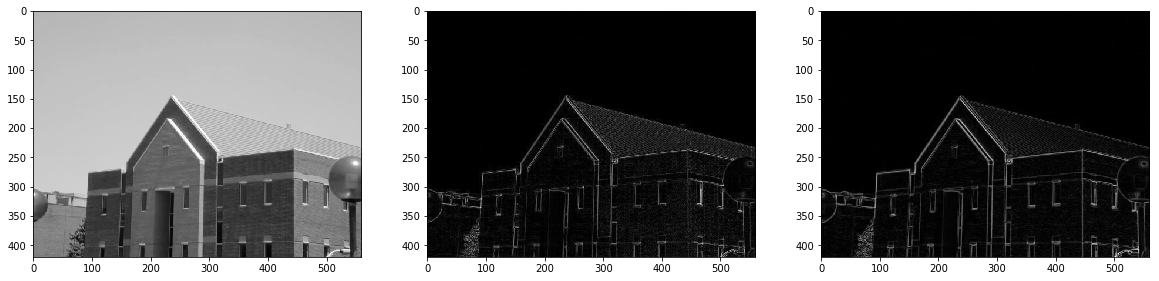

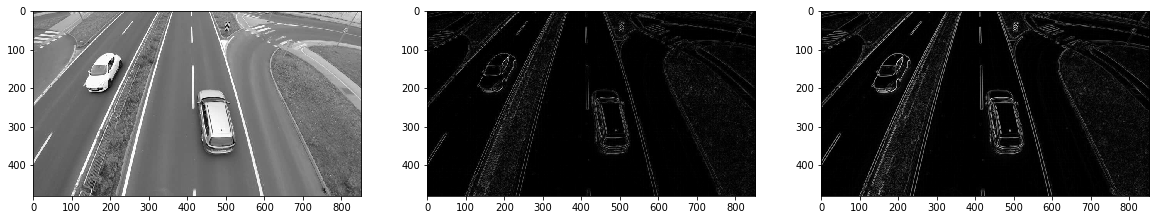

In [1]:
import numpy as np
import scipy.io as scio
import skimage.io as skio
import skimage.color as skolor
import skimage.util as skutil
import skimage.filters as skilter
import skimage.feature as skeature
import skimage.draw as skraw
import scipy.ndimage as scimage
import matplotlib.pyplot as plt

def gradient (image, f) :
    image = skolor.rgb2gray(image)  
    
    xderiv = np.empty_like(image, dtype=float)
    yderiv = np.empty_like(image, dtype=float)
    scimage.correlate(image, f, origin=1, output=xderiv)
    f = np.rot90(f, 3)
    scimage.correlate(image, f, origin=1, output=yderiv)
    
    grad = np.absolute(xderiv) + np.absolute(yderiv)

    return grad

def show_ims (im1, im2, im3) :
    plt.figure(figsize=(20, 25))
    plt.subplot(131)
    plt.imshow(im1, 'gray')
    plt.subplot(132)
    plt.imshow(im2, 'gray', vmin=np.min(im2), vmax=np.max(im2))
    plt.subplot(133)
    plt.imshow(im3, 'gray', vmin=np.min(im3), vmax=np.max(im3))
    plt.show()


f1 = np.array([[0,0,0],[0,-1,1],[0,0,0]])
f2 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

im_cerc = skio.imread('cerc.png')
gf1_cerc = gradient(im_cerc, f1)
gf2_cerc = gradient(im_cerc, f2)

show_ims(im_cerc, gf1_cerc, gf2_cerc)

im_patrat = skio.imread('patrat.png')
gf1_patrat = gradient(im_patrat, f1)
gf2_patrat = gradient(im_patrat, f2)

show_ims(im_patrat, gf1_patrat, gf2_patrat)

im_casa = skio.imread('casa.jpg')
gf1_casa = gradient(im_casa, f1)
gf2_casa = gradient(im_casa, f2)

show_ims(im_casa, gf1_casa, gf2_casa)

im_autostrada = skio.imread('autostrada.jpg')
im_autostrada = skolor.rgb2gray(im_autostrada)
gf1_autostrada = gradient(im_autostrada, f1)
gf2_autostrada = gradient(im_autostrada, f2)

show_ims(im_autostrada, gf1_autostrada, gf2_autostrada)


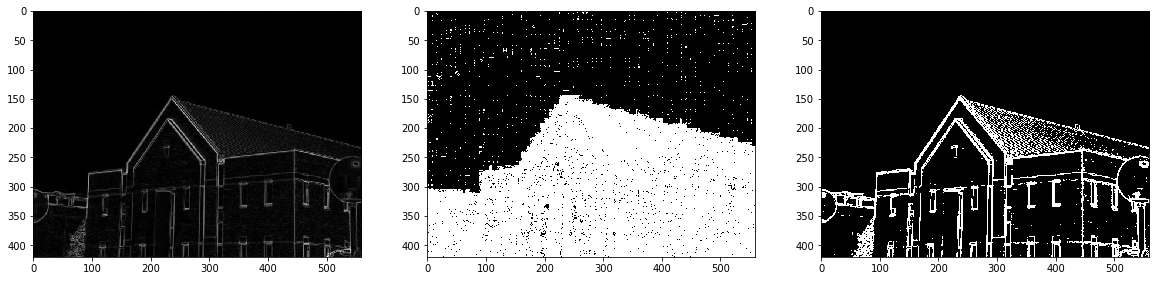

In [2]:
def threshold (image, threshold) :
    return (image > threshold).astype(float)

im = gf2_casa
t1 = np.median(im)
t2 = np.percentile(im, 90.0)

binary1 = threshold(im, t1)
binary2 = threshold(im, t2)


show_ims(im, binary1, binary2)


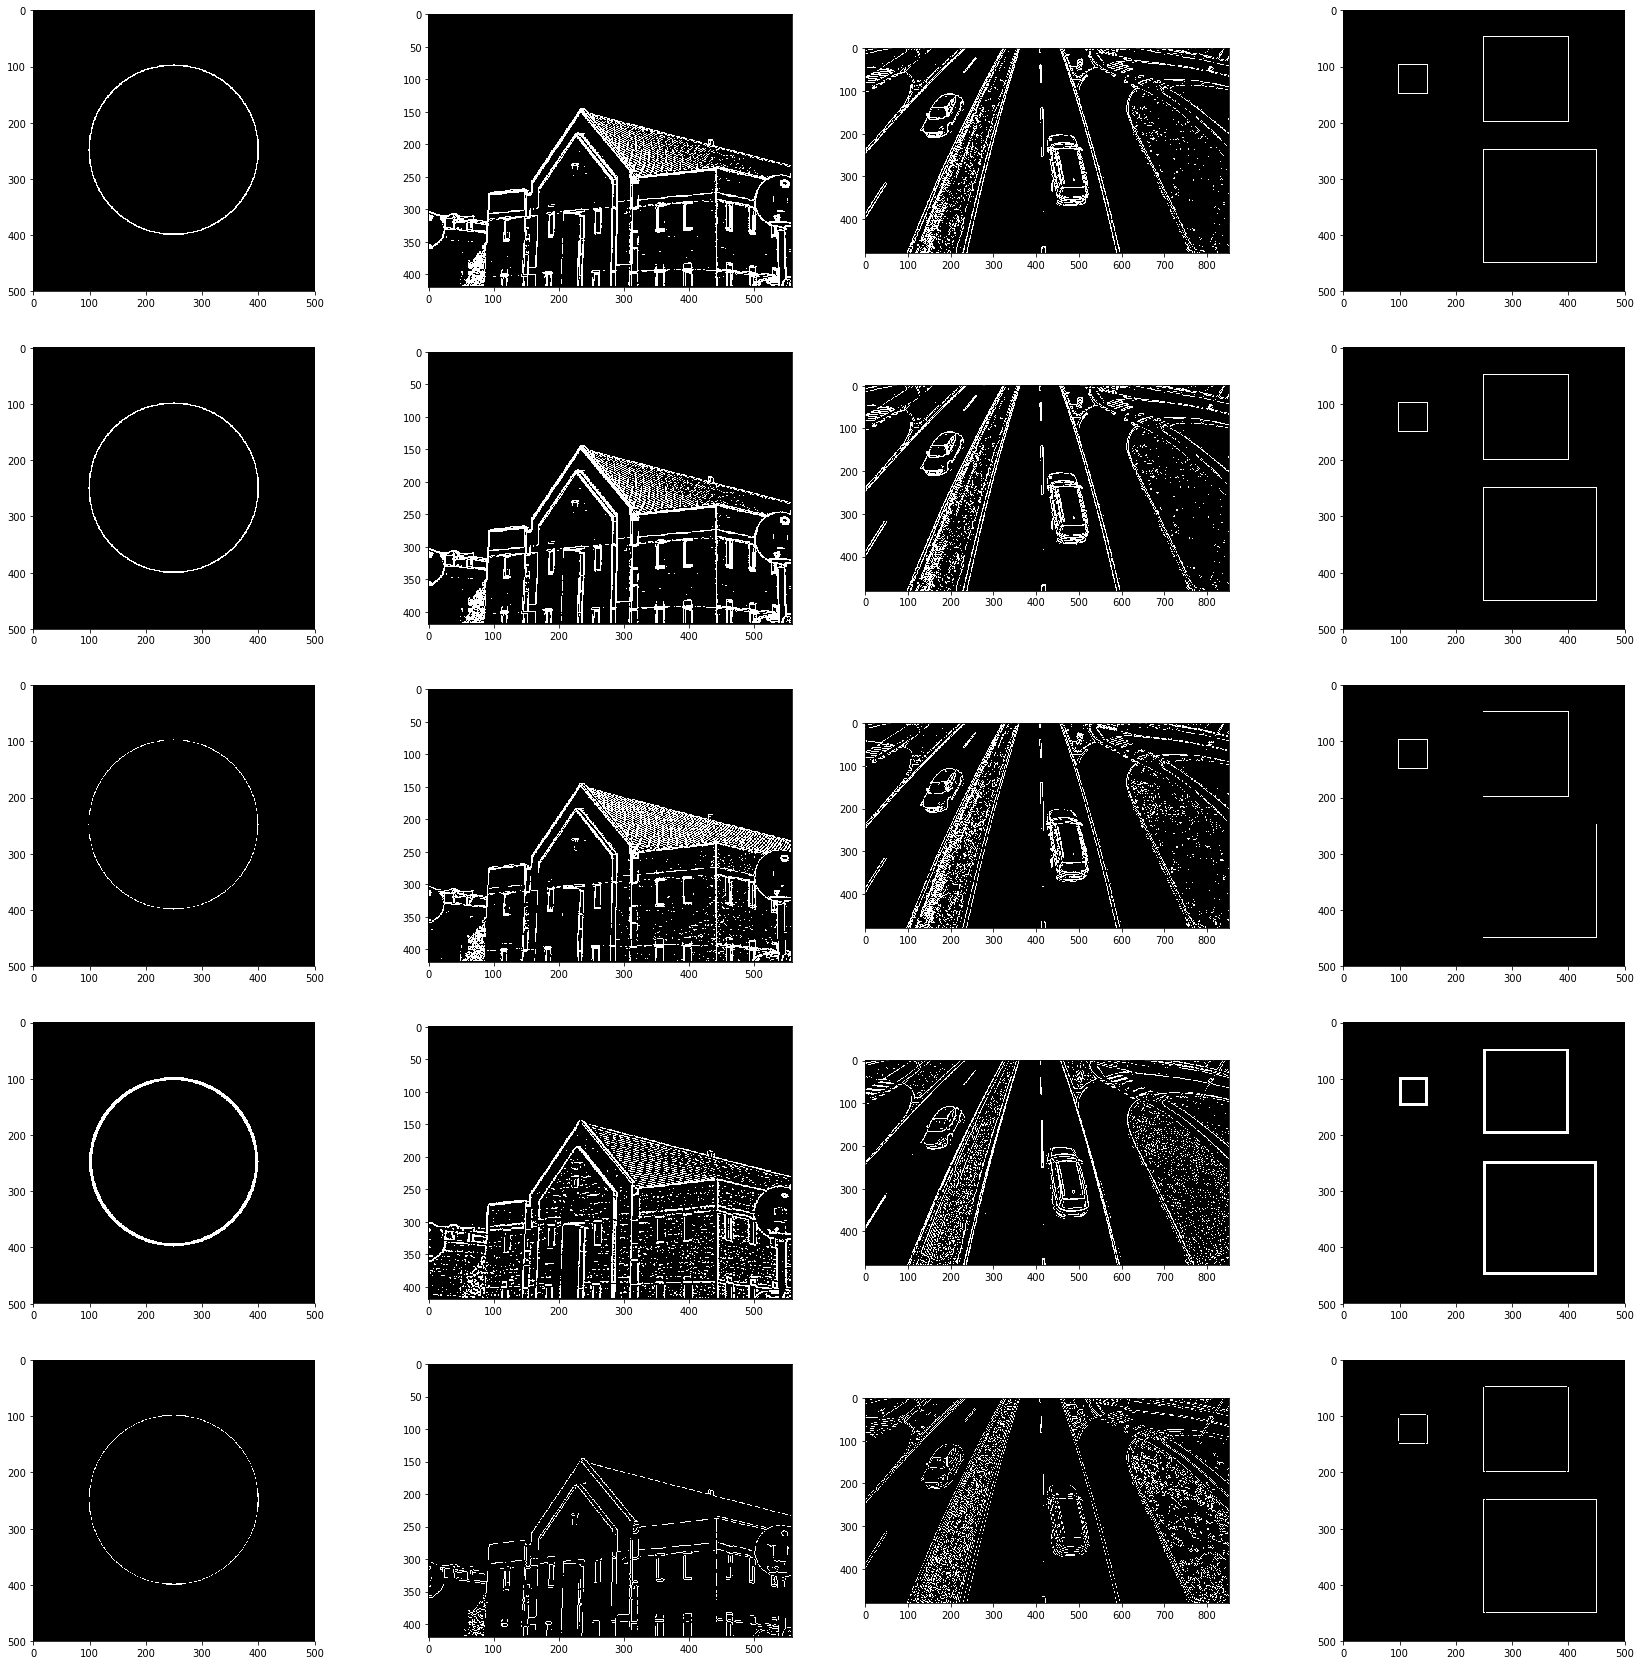

In [3]:
def showim (im) :
    h = im.shape[0]
    w = im.shape[1]
    dpi = 80
    fsize = (h/dpi, w/dpi)
    plt.figure(figsize=fsize)
    if len(im.shape) == 3 :
        plt.imshow(im)
    else :
        plt.imshow(im, 'gray')
    plt.show()
    
imnames = ['cerc.png', 'casa.jpg', 'autostrada.jpg', 'patrat.png']
plt.figure(figsize=(30, 30))
plt_col = 0
for imn in imnames :
    im = skio.imread(imn)
    im = skolor.rgb2gray(im)
    
    plt.subplot(5, 4, 1+plt_col)
    imf_sobel = skilter.sobel(im)
    t = np.percentile(imf_sobel, 90.0)
    imf_sobel = (imf_sobel > t).astype(float)
    plt.imshow(imf_sobel, 'gray')
    
    plt.subplot(5, 4, 5+plt_col)
    imf_prewitt = skilter.prewitt(im)
    t = np.percentile(imf_prewitt, 90.0)
    imf_prewitt = (imf_prewitt > t).astype(float)
    plt.imshow(imf_prewitt, 'gray')
    
    plt.subplot(5, 4, 9+plt_col)
    imf_roberts = skilter.roberts(im)
    t = np.percentile(imf_roberts, 90.0)
    imf_roberts = (imf_roberts > t).astype(float)
    plt.imshow(imf_roberts, 'gray')
    
    plt.subplot(5, 4, 13+plt_col)
    imf_log = skilter.laplace(skilter.gaussian(im))
    t = np.percentile(imf_log, 90.0)
    imf_log = (imf_log > t).astype(float)
    plt.imshow(imf_log, 'gray')
    
    plt.subplot(5, 4, 17+plt_col)
    imf_canny = skeature.canny(im)
    plt.imshow(imf_canny, 'gray')
    
    plt_col += 1
    
plt.show()
    

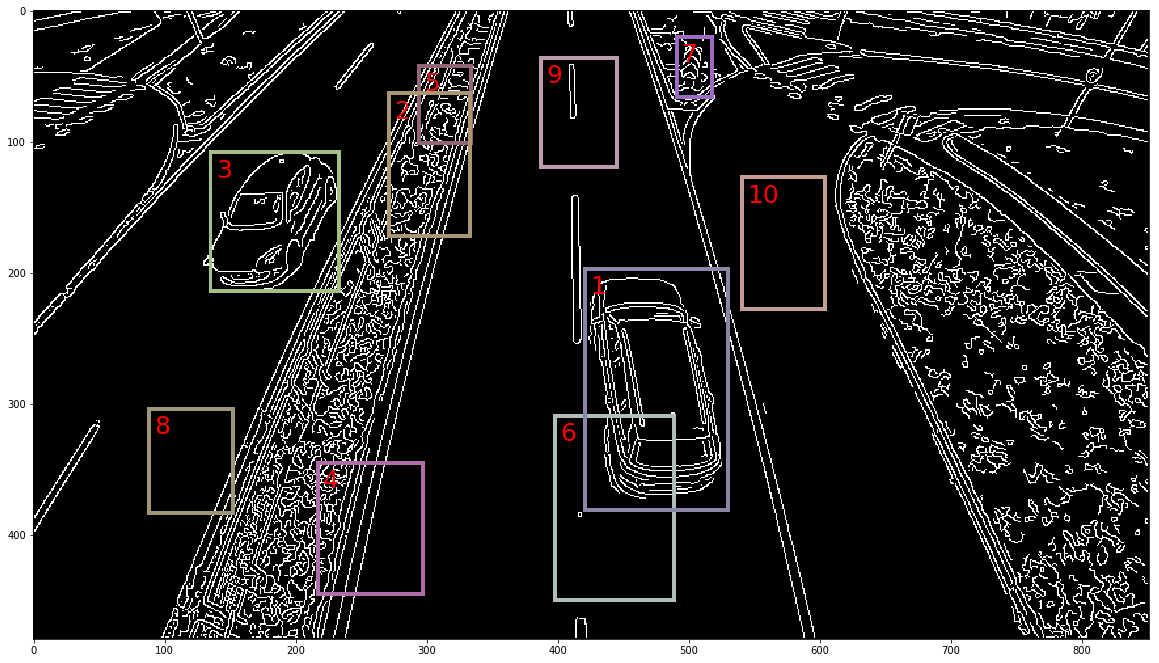

In [5]:
windows = scio.loadmat('ferestreCandidat.mat')
windows = windows['ferestre']

im = skio.imread('autostrada.jpg')
im = skolor.rgb2gray(im)
im = skeature.canny(im).astype(np.uint8) * 255
im = np.dstack((im, im, im))

marg_dens = []
for w in windows : 
    wh = w[2] - w[0]
    ww = w[3] - w[1]
    outers = (slice(w[0], w[2]), slice(w[1], w[3]))
    inners = (slice(w[0]+int(wh/2), w[2]-int(wh/2)), slice(w[1]+int(ww/2), w[3]-int(ww/2)))
    
    owindow = im[outers + (0,)]
    iwindow = im[inners + (0,)]
    marg_dens.append(np.sum(owindow) - np.sum(iwindow))


plt.figure(figsize=(20, 20))

marg_dens = np.array(marg_dens)
wi = np.argsort(marg_dens)
for i in wi :
    w = windows[i]
    bw = 3
    aux = np.array(im[w[0]+bw:w[2]-bw, w[1]+bw:w[3]-bw, :])
    c = np.random.randint(100, 200, (3,))
    im[w[0]:w[2], w[1]:w[3], :] = c
    im[w[0]+bw:w[2]-bw, w[1]+bw:w[3]-bw, :] = aux
    
plt.imshow(im)
rank = len(windows)
for i in wi : 
    w = windows[i]
    plt.text(w[1]+5, w[0]+20, str(rank), fontsize=25, color='red')
    rank -= 1
    
plt.show()

# the windows are ranked in order from the one with the biggest border density to the one with the lowest
# aka 1->biggest; 10->lowest